### Quantum Representations of Audio

#### Using Core Package

The core package can be installed using: ```pip install quantumaudio```

In [112]:
import quantumaudio

In [113]:
qpam = quantumaudio.load_scheme('qpam') # a single-channel quantum audio scheme
mqsm = quantumaudio.load_scheme('mqsm') # a multi-channel quantum audio scheme

### 1) Examples with Signals

#### Create test signals

In [136]:
import numpy as np
np.random.seed(42)

In [137]:
signal = np.random.rand(1,8)
stereo_signal = np.random.rand(2,8)

#### Using Quantum Audio Scheme

Number of qubits required: 3

3 for time
0 for amplitude


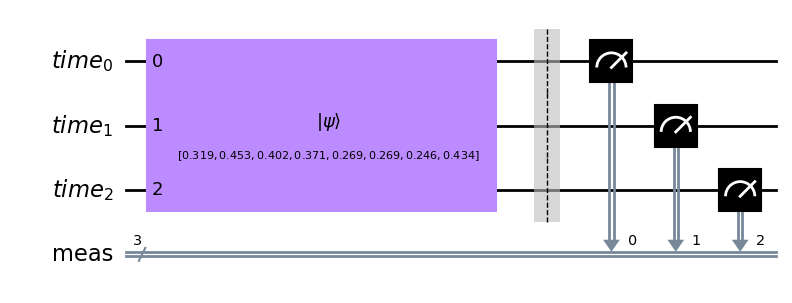

In [138]:
encoded_circuit = qpam.encode(signal,verbose=2)

In [139]:
decoded_signal = qpam.decode(encoded_circuit)

#### Compare Output

In [140]:
from tools import plot

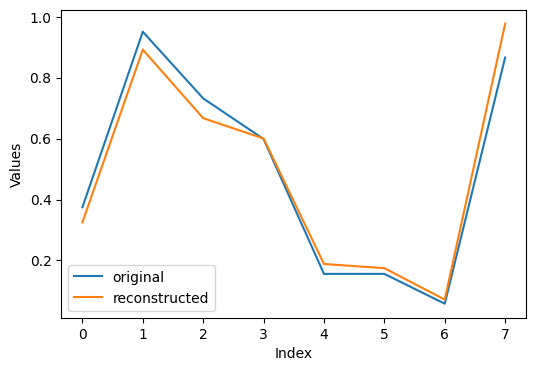

In [141]:
plot([test_signal,decoded_signal])

##### Visualize Output

In [142]:
from tools import interactive

In [143]:
interactive.tune(encoded_circuit,function=qpam.decode,step=2,max_value=4000,ref=signal) # a function to visualize decoding with respect to shots

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function tools.interactive.tune.<locals>.plot_function(shots)>

### 2) Examples with Audio

In [145]:
from tools import audio

In [146]:
path = 'samples/lead_guitar.mp3'

In [157]:
interactive.play(audio.read(path)[0],rate=22050) # preview original audio

In [147]:
y,sr = audio.get_quantumaudio(path,scheme=qpam)

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


100%|█████████████████████████████████████████| 390/390 [00:04<00:00, 90.18it/s]


In [158]:
audio_chunks = tools.stream.get_chunks(audio.read(path)[0])

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


In [159]:
interactive.tune_audio(audio_chunks,scheme=qpam,function=tools.stream.process_chunks)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Shots', max=8000, min=1, step=1…

<function tools.interactive.tune_audio.<locals>.plot_function(shots)>